# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config info
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'

# Build partial query URL:
query_url=f'{url}appid={weather_api_key}&units={units}&q='

In [5]:
city_name=[]       # list for city name
cloudiness=[]      # list for cloudines
country=[]         # list for country
date=[]            # list for date
humidity=[]        # list for humidity
latitude=[]        # list for latitude
longitude=[]       # list for longitude
max_temp=[]        # list for max temperature
wind_speed=[]      # list for wind speed

count_start = 1

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count_start) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                            
            city_name.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])             
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])             
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])   
            
        except KeyError:
            # In case one of the responses comes back with error "KeyError"
            print(city + ' city not found. Skipping...') 
                                                              
        count_start=count_start+1
        
        # Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 634 | taolanaro
taolanaro city not found. Skipping...
Processing Record 2 of 634 | arraial do cabo
Processing Record 3 of 634 | san pedro
Processing Record 4 of 634 | wollongong
Processing Record 5 of 634 | plettenberg bay
Processing Record 6 of 634 | yarada
Processing Record 7 of 634 | ushuaia
Processing Record 8 of 634 | mataura
Processing Record 9 of 634 | port alfred
Processing Record 10 of 634 | punta arenas
Processing Record 11 of 634 | provideniya
Processing Record 12 of 634 | nizhneyansk
nizhneyansk city not found. Skipping...
Processing Record 13 of 634 | agualote
Processing Record 14 of 634 | simao
Processing Record 15 of 634 | yellowknife
Processing Record 16 of 634 | bredasdorp
Processing Record 17 of 634 | havre-saint-pierre
Processing Record 18 of 634 | albany
Processing Record 19 of 634 | airai
Processing Record 20 of 634 | pevek
Processing Record 21 of 634 | sentyabrskiy
sentyabrskiy city not 

Processing Record 192 of 634 | maniitsoq
Processing Record 193 of 634 | damghan
Processing Record 194 of 634 | lakhtar
Processing Record 195 of 634 | ulladulla
Processing Record 196 of 634 | moussoro
Processing Record 197 of 634 | ostrovnoy
Processing Record 198 of 634 | saldanha
Processing Record 199 of 634 | belmonte
Processing Record 200 of 634 | marcona
marcona city not found. Skipping...
Processing Record 201 of 634 | leningradskiy
Processing Record 202 of 634 | almaznyy
Processing Record 203 of 634 | vazhiny
Processing Record 204 of 634 | ponta delgada
Processing Record 205 of 634 | bulawayo
Processing Record 206 of 634 | tupelo
Processing Record 207 of 634 | guilin
Processing Record 208 of 634 | ambilobe
Processing Record 209 of 634 | lubyany
Processing Record 210 of 634 | oktyabrskiy
Processing Record 211 of 634 | alma
Processing Record 212 of 634 | luau
Processing Record 213 of 634 | louis trichardt
Processing Record 214 of 634 | alice springs
Processing Record 215 of 634 | ka

Processing Record 385 of 634 | calatayud
Processing Record 386 of 634 | tawau
Processing Record 387 of 634 | longyearbyen
Processing Record 388 of 634 | verkhnyaya inta
Processing Record 389 of 634 | broken hill
Processing Record 390 of 634 | brantford
Processing Record 391 of 634 | mayumba
Processing Record 392 of 634 | karachi
Processing Record 393 of 634 | chuy
Processing Record 394 of 634 | bud
Processing Record 395 of 634 | san
Processing Record 396 of 634 | mys shmidta
mys shmidta city not found. Skipping...
Processing Record 397 of 634 | zheleznodorozhnyy
Processing Record 398 of 634 | marica
Processing Record 399 of 634 | lewistown
Processing Record 400 of 634 | adeje
Processing Record 401 of 634 | paamiut
Processing Record 402 of 634 | pacific grove
Processing Record 403 of 634 | nyurba
Processing Record 404 of 634 | kiunga
Processing Record 405 of 634 | kamenka
Processing Record 406 of 634 | belushya guba
belushya guba city not found. Skipping...
Processing Record 407 of 634 

Processing Record 578 of 634 | hailar
Processing Record 579 of 634 | hamilton
Processing Record 580 of 634 | portales
Processing Record 581 of 634 | atbasar
Processing Record 582 of 634 | bantry
Processing Record 583 of 634 | sao paulo de olivenca
Processing Record 584 of 634 | angoram
Processing Record 585 of 634 | ponta do sol
Processing Record 586 of 634 | antalaha
Processing Record 587 of 634 | leshukonskoye
Processing Record 588 of 634 | bathsheba
Processing Record 589 of 634 | erzin
Processing Record 590 of 634 | manggar
Processing Record 591 of 634 | kremnica
Processing Record 592 of 634 | lethem
Processing Record 593 of 634 | goundi
Processing Record 594 of 634 | natal
Processing Record 595 of 634 | palasa
Processing Record 596 of 634 | verkhoyansk
Processing Record 597 of 634 | kambove
Processing Record 598 of 634 | puerto penasco
Processing Record 599 of 634 | tuy hoa
Processing Record 600 of 634 | saiha
Processing Record 601 of 634 | skalistyy
skalistyy city not found. Skipp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature (F)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.isnull().sum()
weather_data.dropna() 
weather_data.count()

City                   594
Country                594
Date                   594
Latitude               594
Longitude              594
Max Temperature (F)    594
Humidity (%)           594
Cloudiness (%)         594
Wind Speed (mph)       594
dtype: int64

In [9]:
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Arraial do Cabo,BR,1613072785,-22.9661,-42.0278,78.80,78,75,8.05
1,City of San Pedro,PH,1613072819,14.3500,121.0167,79.00,83,20,9.22
2,Wollongong,AU,1613072819,-34.4333,150.8833,68.00,87,100,1.01
3,Plettenberg Bay,ZA,1613072819,-34.0527,23.3716,71.85,95,100,3.29
4,Yārāda,IN,1613072819,17.6500,83.2667,68.00,94,74,2.30


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data['Humidity (%)'] > 100]

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

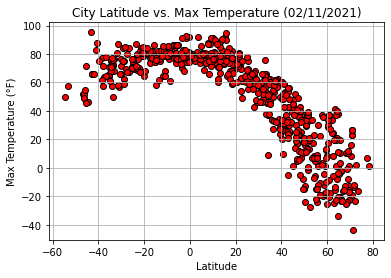

In [21]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature (F)"], facecolors="red", marker="o", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (02/11/2021)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure:
#plt.savefig("output_data/City Latitude vs. MaxTemp.png")

plt.show()

## Latitude vs. Humidity Plot

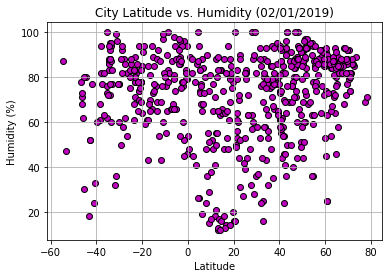

In [25]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], facecolors="m", marker="o", edgecolor="black")

plt.title("City Latitude vs. Humidity (02/11/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

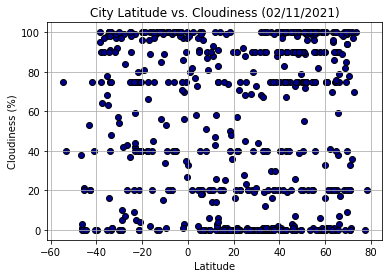

In [27]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], facecolors="darkblue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Cloudiness (02/11/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

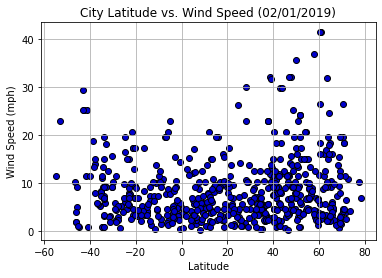

In [29]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], facecolors="mediumblue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Wind Speed (02/11/2021")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression